<h2 style="color:red" align="center">Multiple Linear Regression: CO2 Emission Prediction</h2>

## Problem: Similarly to the simple model, but build the model using more than one dependent variable.

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

### Load and read data

In [8]:
df = pd.read_csv('E:\Python\ML_Learn\Predict_Fuel_Consumption_Model\FuelConsumptionCo2.csv')
df.head()
#Select some feature to train
cdf = df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()


,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


### Plotting

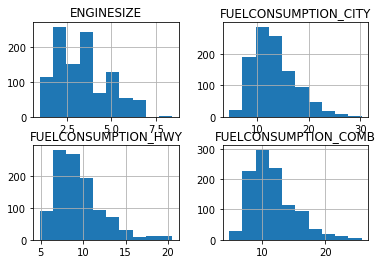

In [11]:
viz = cdf[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',]]
viz.hist()
plt.show()

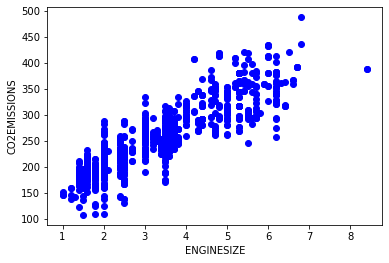

In [12]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

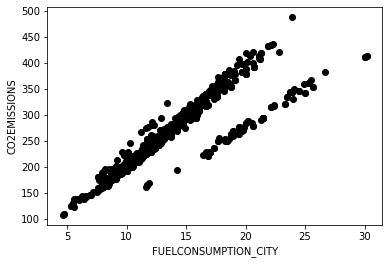

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS, color = "black")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

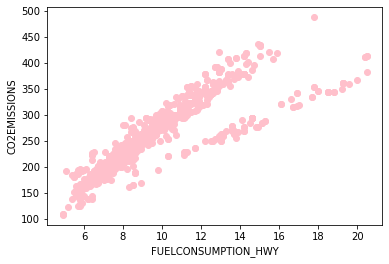

In [16]:
plt.scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS, color = "pink")
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.show()

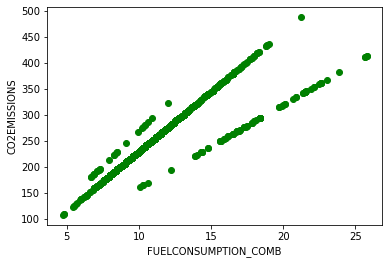

In [21]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color = "green")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

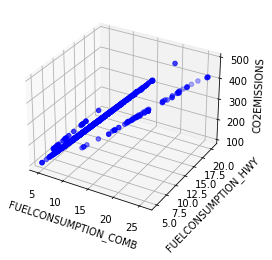

In [40]:
# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cdf.FUELCONSUMPTION_COMB,cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS, color = "blue", marker = "o")
ax.set_xlabel('FUELCONSUMPTION_COMB')
ax.set_ylabel('FUELCONSUMPTION_HWY')
ax.set_zlabel('CO2EMISSIONS')
plt.show()

#### Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [23]:
#random data for training and testing
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]       

#### Visualize training data

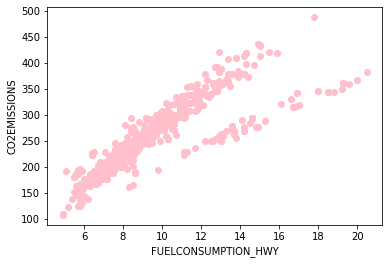

In [24]:
plt.scatter(train.FUELCONSUMPTION_HWY,train.CO2EMISSIONS, color = "pink")
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.show()

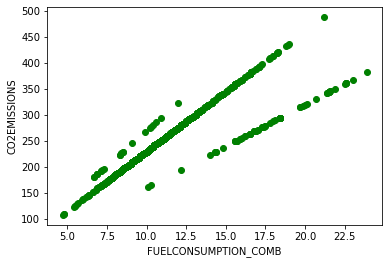

In [26]:
plt.scatter(train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS, color = "green")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Modeling Process

In [53]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(x,y)
print("The parameter vector: ",reg.coef_)
print("The intercept: ",reg.intercept_)

The parameter vector:  [[ 17.64804733  -8.53456329 -11.88984286  29.83488333]]
The intercept:  [77.8880341]


Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

LR equation:  $Y = X \times \mathbf{W}^\intercal$.

$X$: The $1\times n$ matrix $(1,x_1,x_2,x_3...x_n)$ --> Include $n$ independent variables.

$\mathbf{W}^\intercal = \begin{bmatrix}
         \omega_{0} \\
         \omega_{1} \\ 
         \vdots \\ 
         \omega_{n}  
     \end{bmatrix}$ : Matrix of parameters of LR model.


#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

### Variance regression score:


Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.

### Testing process with 20% of dataset

In [46]:
# Output testset
test

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
4,3.5,12.1,8.7,10.6,244
8,3.7,13.4,9.5,11.6,267
9,2.4,10.6,7.5,9.2,212
37,2.0,11.8,8.8,10.5,242
38,2.0,12.0,8.5,10.4,239
...,...,...,...,...,...
1047,3.6,12.4,8.8,10.8,248
1049,2.0,8.0,5.4,6.8,184
1055,3.0,12.3,8.0,10.4,281
1056,2.5,11.3,7.8,9.7,223


In [70]:
y_hat = reg.predict(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
d = {"CO2EMISSIONS": np.reshape(test.CO2EMISSIONS,np.size(test.CO2EMISSIONS)) ,
"CO2EMISSIONS PREDICT": np.reshape(y_hat,np.size(y_hat))}
res = pd.DataFrame(data=d) #Create a new data frame to compare 
res

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,CO2EMISSIONS,CO2EMISSIONS PREDICT
4,244,249.196114
8,267,261.953801
9,212,215.084082
37,242,221.111940
38,239,219.988492
...,...,...
1047,248,253.178542
1049,184,183.579678
1055,281,241.021091
1056,223,222.225181


### Evaluate Accuracy

In [72]:
x_test = np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[["CO2EMISSIONS"]]) #Real value in testset
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test ) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x, y))

Residual sum of squares: 658.40
Variance score: 0.86
